In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv


# Data Overview

In [114]:
df = pd.read_csv('/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv')

In [115]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [117]:
df.shape

(1500, 9)

In [118]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [119]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


# Data Visualization

<Axes: >

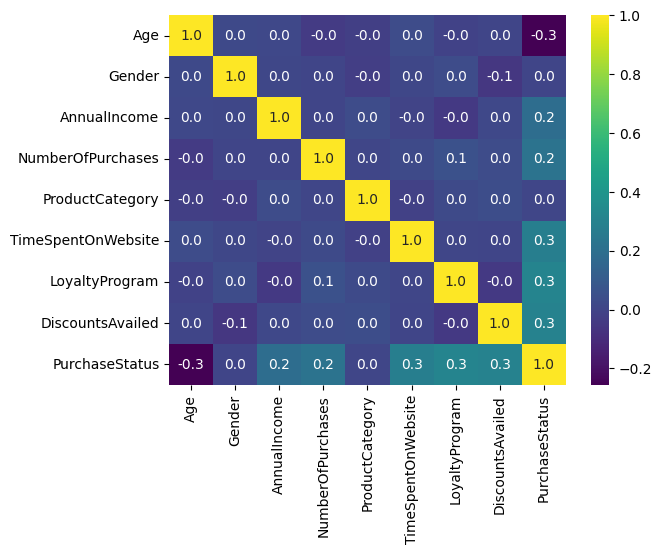

In [120]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', fmt = '.1f')

# Key Insights from the Correlation Matrix:

Age and PurchaseStatus: There is a moderate negative correlation (-0.3) between Age and PurchaseStatus. This suggests that older customers may be less likely to make purchases, indicating that younger customers are a key target group for marketing efforts.

Annual Income and PurchaseStatus: A moderate positive correlation (0.2) between Annual Income and PurchaseStatus suggests that higher-income individuals are more likely to make purchases. This points to a potential strategy of targeting wealthier customer segments with premium offerings or tailored promotions.

Loyalty Program and PurchaseStatus: There is a moderate positive correlation (0.3) between Loyalty Program participation and PurchaseStatus. Customers who are part of a loyalty program are more likely to make a purchase. This reinforces the importance of customer retention strategies through loyalty incentives.

Discounts Availed and PurchaseStatus: Discounts availed show a positive correlation (0.3) with PurchaseStatus. This highlights the effectiveness of discount-based campaigns in encouraging purchases, suggesting that timely and targeted discounts could drive customer engagement and conversions.

Time Spent on Website: Interestingly, Time Spent on Website has a weak correlation (0.3) with PurchaseStatus, which may indicate that while increased engagement on the site correlates slightly with purchases, other factors like loyalty and discounts have stronger predictive power.

# Business Recommendations:

Target Younger Audiences: Since younger customers are more likely to make purchases, marketing campaigns should focus on platforms and channels that resonate with this demographic.
Income-Based Segmentation: Tailor premium offers or exclusive deals to higher-income groups, as they are more likely to convert.
Enhance Loyalty Programs: Strengthening the loyalty program can lead to higher repeat purchases and customer retention, as shown by the positive correlation with purchase status.
Leverage Discounts: Implement strategic discount campaigns to boost conversions, especially for price-sensitive customers.

In [121]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [122]:
df_dist = ['Age','AnnualIncome','TimeSpentOnWebsite']

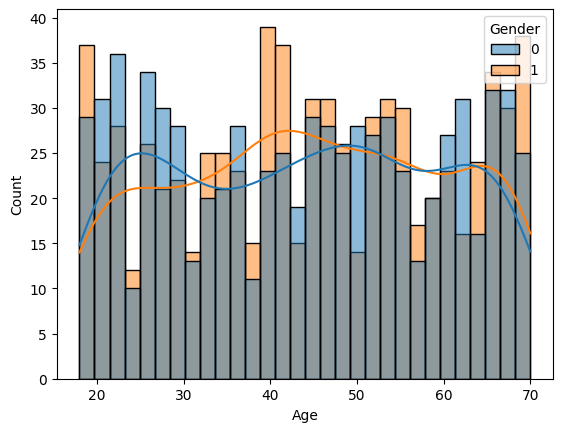

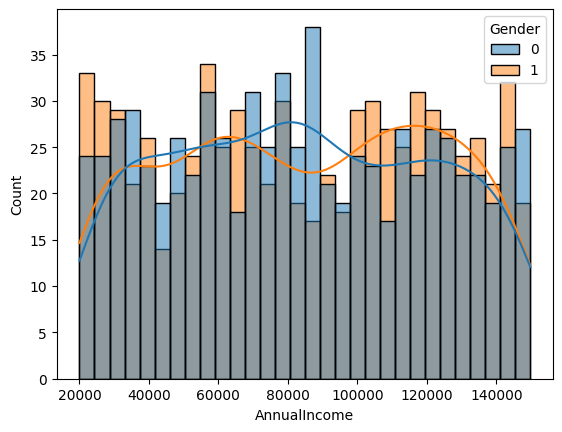

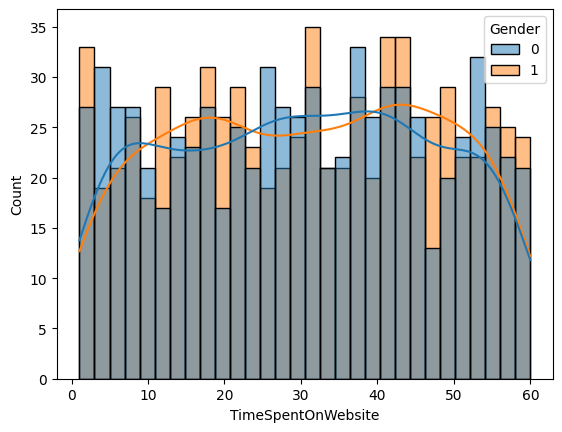

In [123]:
for col in df_dist:
    sns.histplot(x = col, data = df, bins = 30, kde = True, hue = 'Gender')
    plt.show()

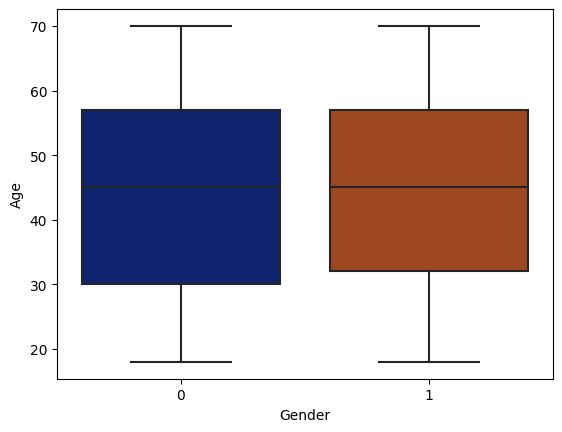

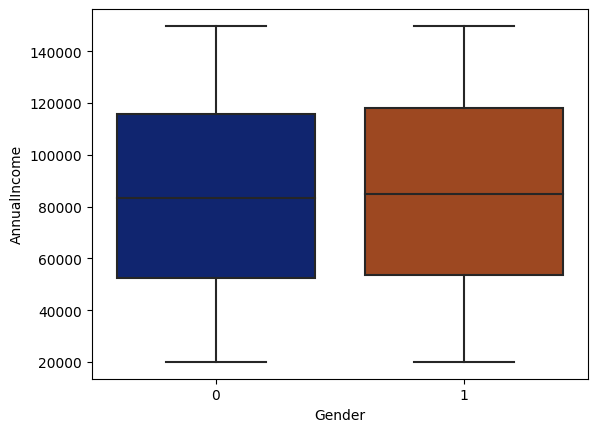

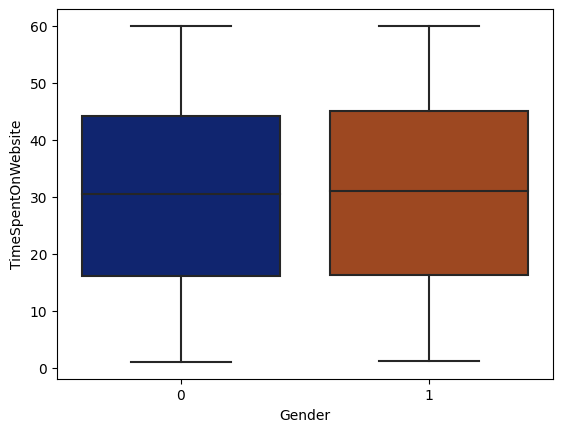

In [124]:
for col in df_dist:
    sns.boxplot(y = col, data = df, x = 'Gender', palette = 'dark')
    plt.show()

Text(0, 0.5, '')

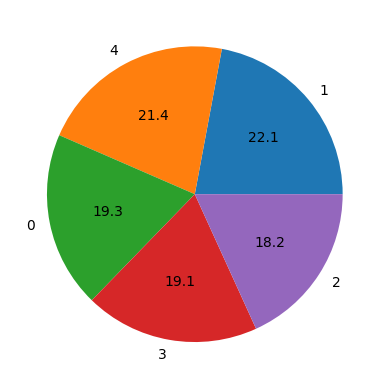

In [125]:
df['ProductCategory'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)

<Axes: xlabel='Gender', ylabel='count'>

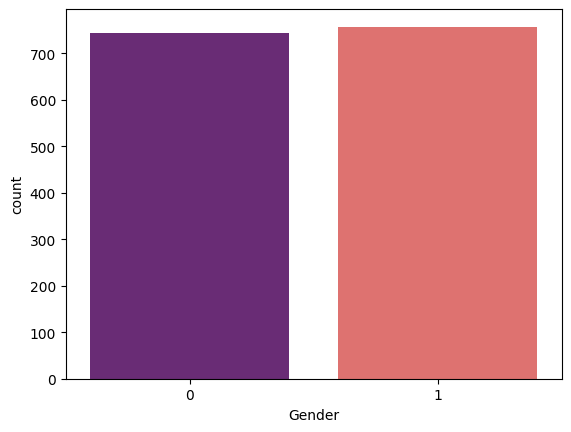

In [126]:
sns.countplot(x = 'Gender', data = df, palette = 'magma')

In [127]:
df1 = df['PurchaseStatus'].value_counts()
df1

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

<Axes: xlabel='PurchaseStatus'>

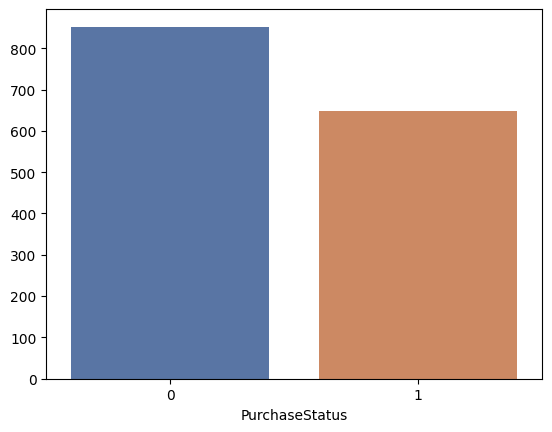

In [128]:
sns.barplot(x = df1.index, y = df1.values, palette = 'deep')

# Model Training

In [129]:
x = df.drop('PurchaseStatus', axis = 1)
y = df['PurchaseStatus']

In [130]:
x.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [131]:
# numerical col
df_stdcol = ['Age','AnnualIncome','NumberOfPurchases','TimeSpentOnWebsite','DiscountsAvailed'] 

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scale = StandardScaler()

In [134]:
for col in df_stdcol:
    x[col] = scale.fit_transform(x[[col]])

In [135]:
x.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,-0.276761,1,-0.481934,-0.411185,0,0.005864,0,1.434172
1,-1.564418,1,-1.612821,-1.090830,2,0.457694,0,1.434172
2,-1.113738,1,1.158311,0.098548,2,0.068566,1,-1.499095
3,-1.306887,1,1.423546,1.457838,3,0.924570,0,0.847519
4,-0.856207,1,0.400133,1.457838,1,-0.626987,0,-1.499095


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42 )

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [139]:
dt = DecisionTreeClassifier(max_depth=7,criterion='entropy',random_state=1)
rf = RandomForestClassifier(min_samples_leaf=2,random_state=1)
svc = SVC(random_state=1)
lr = LogisticRegression(max_iter=200, random_state=1)

In [140]:
classifier = {'Decision Tree' : dt,
             'Random Forest' : rf,
             'Support Venctor Classifier' : svc,
             'Logistic Regression' : lr}

In [141]:
classifier.items()

dict_items([('Decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)), ('Random Forest', RandomForestClassifier(min_samples_leaf=2, random_state=1)), ('Support Venctor Classifier', SVC(random_state=1)), ('Logistic Regression', LogisticRegression(max_iter=200, random_state=1))])

# Accuracy Evaluation

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

Decision Tree Trainng Accuracy : 0.9752380952380952
Decision Tree Test Accuracy : 0.9044444444444445
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       257
           1       0.91      0.87      0.89       193

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450

Axes(0.125,0.11;0.62x0.77)


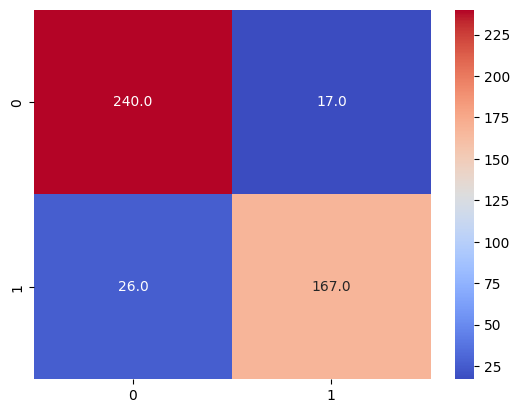

Random Forest Trainng Accuracy : 0.9695238095238096
Random Forest Test Accuracy : 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       257
           1       0.97      0.88      0.92       193

    accuracy                           0.93       450
   macro avg       0.94      0.93      0.93       450
weighted avg       0.94      0.93      0.93       450

Axes(0.125,0.11;0.62x0.77)


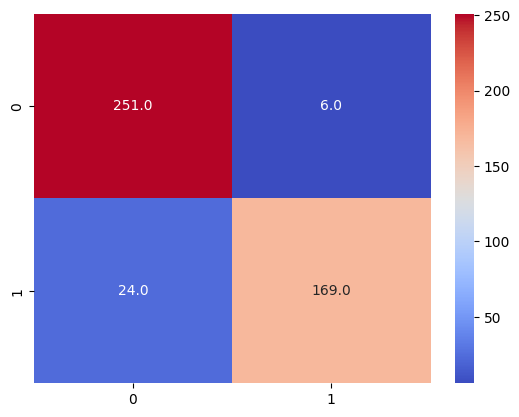

Support Venctor Classifier Trainng Accuracy : 0.8790476190476191
Support Venctor Classifier Test Accuracy : 0.8622222222222222
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       257
           1       0.89      0.77      0.83       193

    accuracy                           0.86       450
   macro avg       0.87      0.85      0.86       450
weighted avg       0.86      0.86      0.86       450

Axes(0.125,0.11;0.62x0.77)


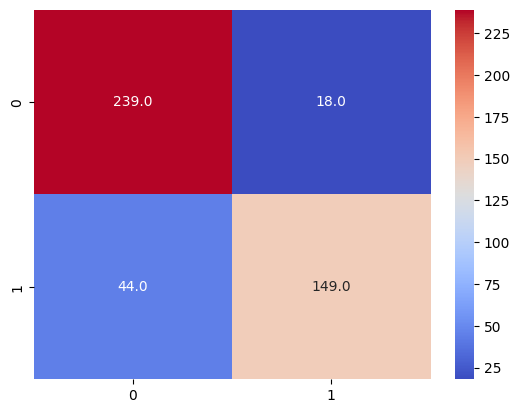

Logistic Regression Trainng Accuracy : 0.8152380952380952
Logistic Regression Test Accuracy : 0.8222222222222222
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       257
           1       0.84      0.73      0.78       193

    accuracy                           0.82       450
   macro avg       0.83      0.81      0.81       450
weighted avg       0.82      0.82      0.82       450

Axes(0.125,0.11;0.62x0.77)


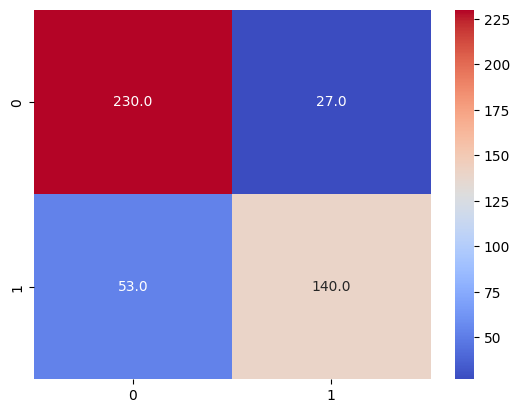

In [143]:
for name,model in classifier.items():
    model.fit(x_train,y_train)
    print(name,'Trainng Accuracy :', model.score(x_train,y_train))
    print(name,'Test Accuracy :', model.score(x_test,y_test))
    print('='*60)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = '.1f',cmap = 'coolwarm'))
    plt.show()
    

# Summary :

**Best Model => Random Forest**

### Key Model Performance Metrics:

Training Accuracy: 96.95%
The Random Forest classifier achieves a high accuracy on the training data, suggesting that it has effectively learned the underlying patterns. However, such a high accuracy could indicate slight overfitting, though this is mitigated by the robust test accuracy.

Test Accuracy: 93.33%
The test accuracy of 93.33% demonstrates that the model generalizes well to unseen data, indicating strong performance and minimal overfitting. This suggests that the model can make accurate predictions when deployed in real-world scenarios.

Precision, Recall, and F1-Score:
For class '0' (Non-purchasers or negative class):

Precision: 91%
Recall: 98%
F1-Score: 94%
This means that the model is highly accurate in predicting when a customer will not make a purchase (class 0), and it correctly identifies 98% of actual non-purchasers.

For class '1' (Purchasers or positive class):

Precision: 97%
Recall: 88%
F1-Score: 92%
The model also performs well in predicting customers who will make a purchase (class 1). The precision of 97% indicates that when the model predicts a customer will purchase, it is correct 97% of the time. However, with a recall of 88%, it misses some actual purchasers.

### Confusion Matrix:
True Negatives (Top-left): 251 customers who were correctly predicted as non-purchasers (class 0).
False Positives (Top-right): 6 customers incorrectly predicted as purchasers (class 1).
False Negatives (Bottom-left): 24 customers who were incorrectly predicted as non-purchasers (class 0).
True Positives (Bottom-right): 169 customers correctly predicted as purchasers (class 1).
Business Interpretation:
High Precision and Recall for both classes indicate that the model is highly reliable in predicting whether a customer will make a purchase or not. This can be especially useful for marketing and sales strategies. By identifying non-purchasers with high accuracy, businesses can focus marketing efforts on potential purchasers (class 1).

Low False Positives (6) indicate that few non-purchasers are incorrectly classified as purchasers, which means that unnecessary marketing expenses can be minimized.

Low False Negatives (24) suggest that the model misses a relatively small number of actual purchasers, which means that fewer sales opportunities are lost due to incorrect predictions.

### Conclusion:
With a Test Accuracy of 93.33%, the Random Forest model demonstrates strong generalization to unseen data and is reliable for production use. It can be used to inform business decisions, such as targeted marketing campaigns and customer retention strategies. The balanced precision, recall, and F1-scores suggest that this model will help optimize resource allocation and enhance customer engagement strategies, potentially leading to increased sales and customer satisfacti